# IRCCAM Normalization

In [5]:
import mat73
import numpy as np
import matplotlib.pyplot as plt

In [2]:
idata = mat73.loadmat('../../data/raw/davos/irccam/irccam_20190816_rad.mat')

In [96]:
bt = idata['BT']
bt = bt.reshape(-1)
bt_vals = bt[~np.isnan(bt)]

<BarContainer object of 1000 artists>

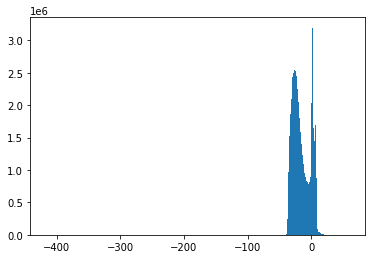

In [37]:
plt.hist(bt_vals, bins=1000)[2]

In [48]:
min_val = np.quantile(bt_vals, 0.001)
max_val = np.quantile(bt_vals, 0.999)

In [84]:
def normalize_irccam_image(img_ir_raw):
    mi = min_val
    ma = max_val
    lower = img_ir_raw < mi
    higher = img_ir_raw > ma
    gray_ir = img_ir_raw - mi
    gray_ir *= 60000 / (ma - mi)
    np.nan_to_num(gray_ir, copy=False, nan=(2 ** 16 - 1))
    gray_ir[lower] = 0
    gray_ir[higher] = 60000
    return gray_ir.astype(np.uint16)

In [85]:
def plot_img(img):
    plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')
    implot = plt.imshow(img, cmap='gray')

In [86]:
ir_raw = idata['BT'][:,:,500]

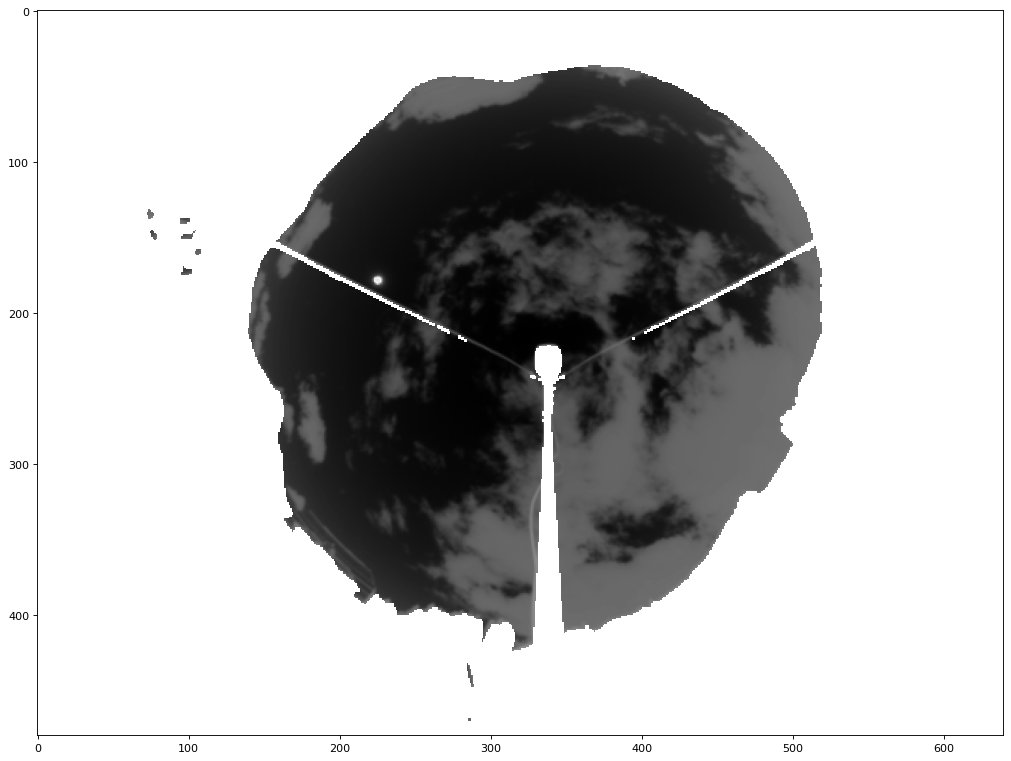

In [87]:
plot_img(ir_raw)

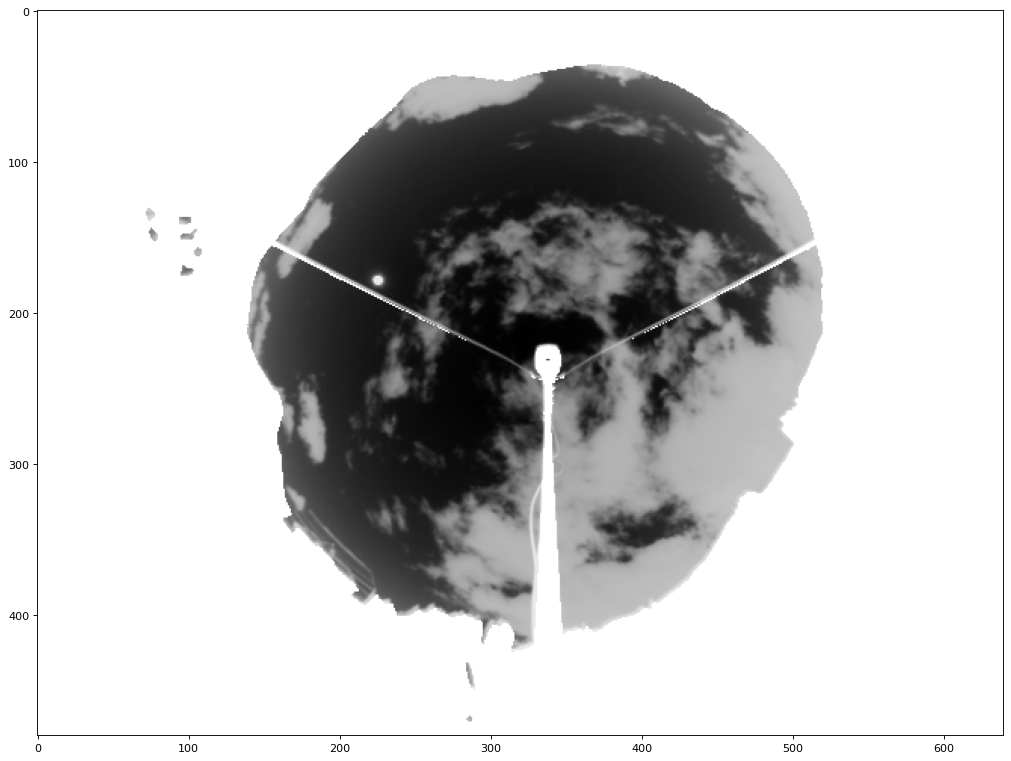

In [88]:
plot_img(normalize_irccam_image(ir_raw))

In [78]:
print(np.quantile(bt_vals, 0.01),np.quantile(bt_vals, 0.99))
print(np.quantile(bt_vals, 0.001),np.quantile(bt_vals, 0.999))
print(np.quantile(bt_vals, 0.0001),np.quantile(bt_vals, 0.9999))
print(np.quantile(bt_vals, 0.00001),np.quantile(bt_vals, 0.99999))

-36.225860595703125 7.895927429199219
-37.80395709228516 14.933757995605447
-38.566173596191405 25.598672326654196
-39.02620793457031 59.35550979003756


In [90]:
bt_vals.min(), bt_vals.max()

(-417.4659, 60.28927)

In [91]:
data_20180222 = mat73.loadmat('../../data/raw/davos/irccam/irccam_20180222_rad.mat')

In [92]:
bt = data_20180222['BT']
bt = bt.reshape(-1)
bt_vals = bt[~np.isnan(bt)]
print(bt_vals.min(), bt_vals.max())

51.987846 54.513878


<BarContainer object of 10 artists>

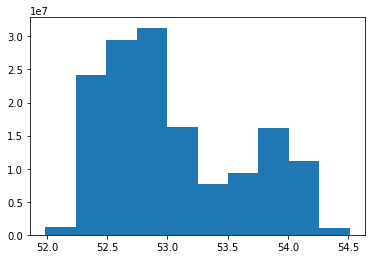

In [93]:
plt.hist(bt_vals)[2]

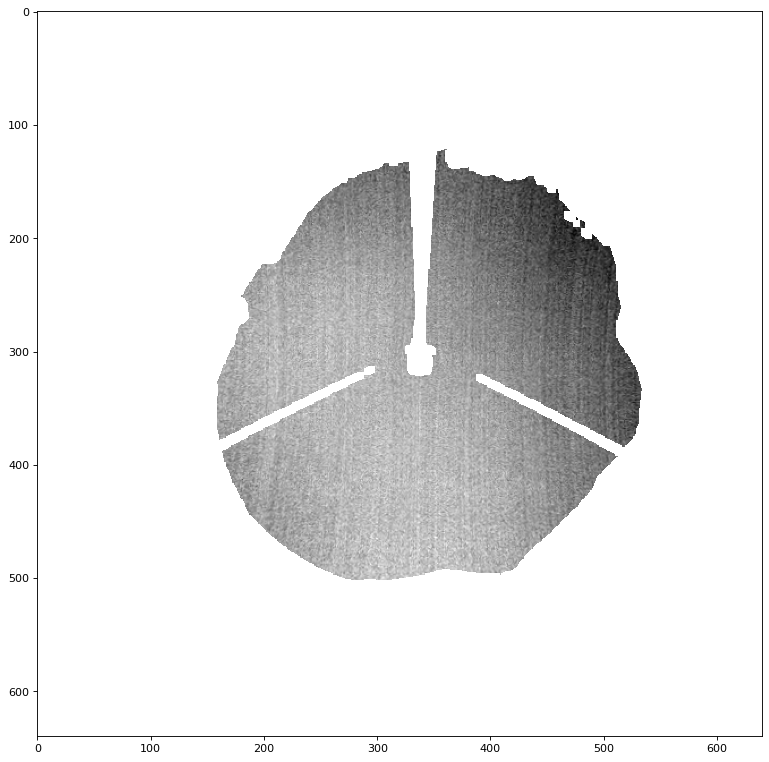

In [95]:
plot_img(data_20180222['BT'][:,:,300])

We should check the data over many different days and come up with realistic min and max thresholds.